In [1]:
import scanpy as sc

In [2]:
adata = sc.read('D:/UCI Research/CellxGene Tutorial/data/brain_qc.h5ad')

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


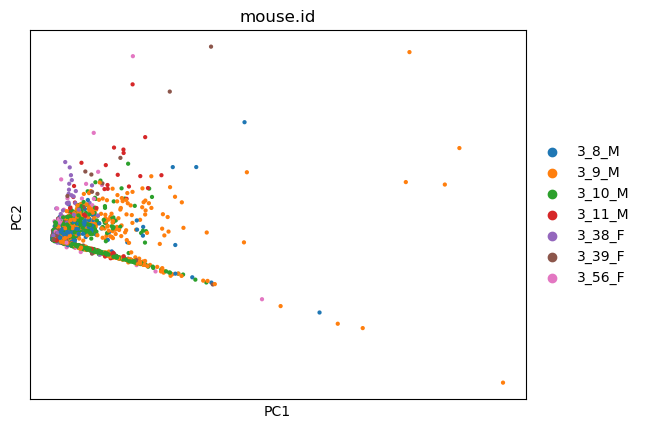

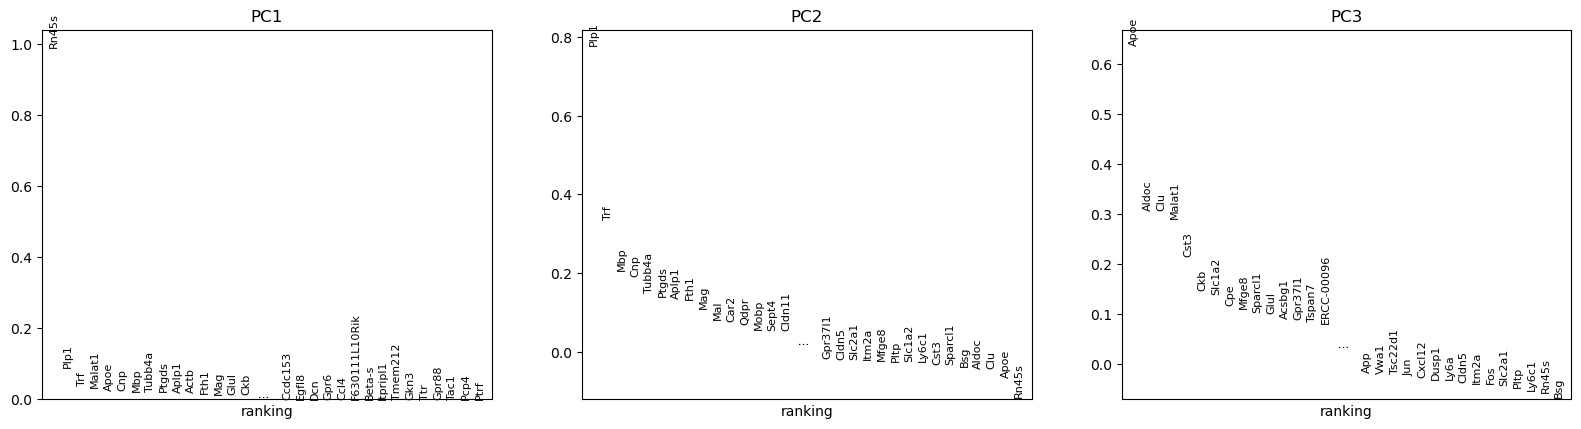

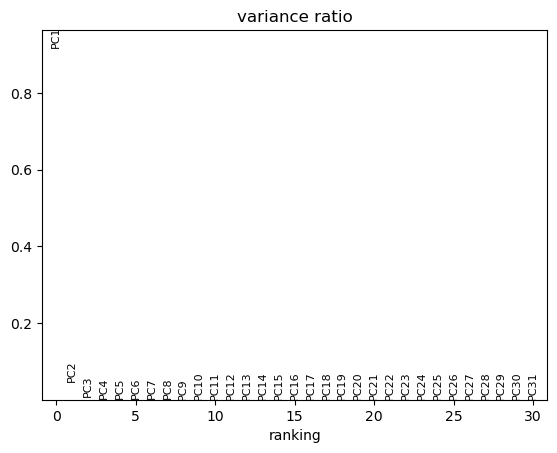

In [3]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='mouse.id')

# Normalizing cell library size 

In [16]:
# Convert the data matrix to float64
adata.X = adata.X.astype('float64')

# Perform PCA
sc.pp.pca(adata)

In [17]:
adata_cpm = adata.copy() # apply this to a copy so we can compare methods
adata_cpm.raw = adata_cpm # store a copy of the raw values before normalizing
sc.pp.normalize_per_cell(adata_cpm, 
                         counts_per_cell_after=1e6)

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


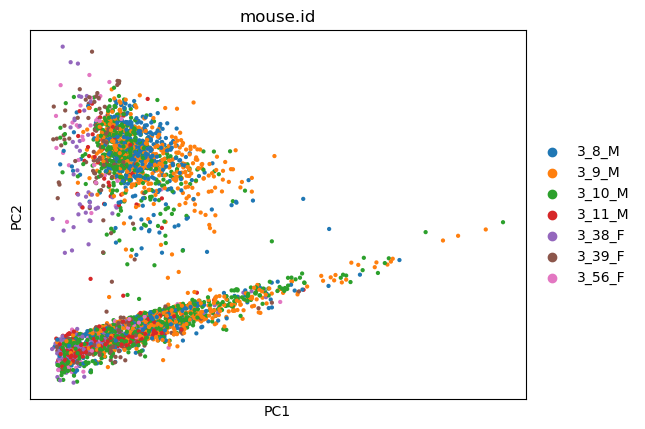

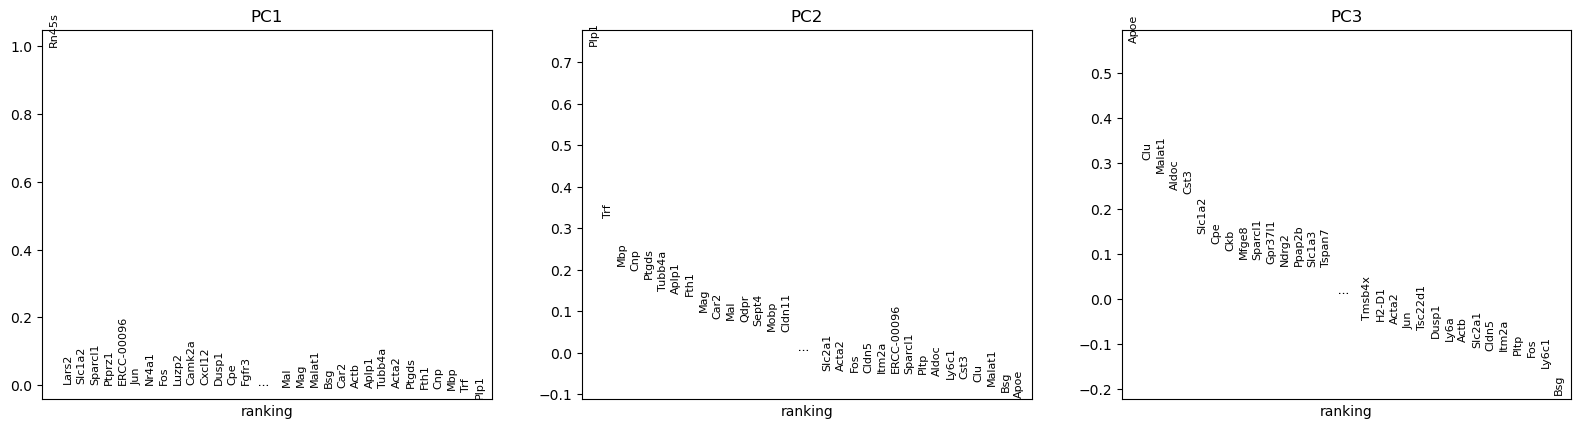

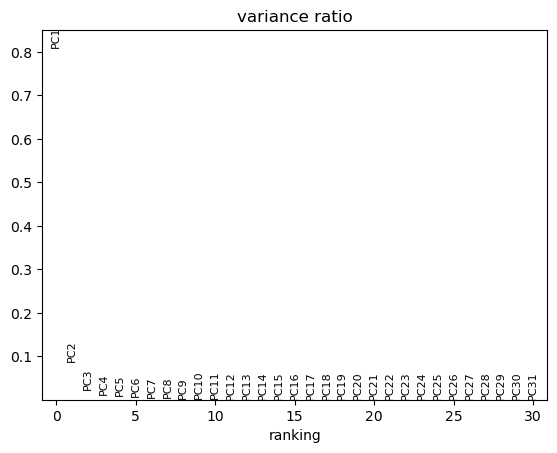

In [18]:
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='mouse.id')

In [ ]:
# Use the SCANPY function sc.pp.normalize_total() to normalize with counts per million,
# excluding highly expressed genes from the size factor calculation.

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


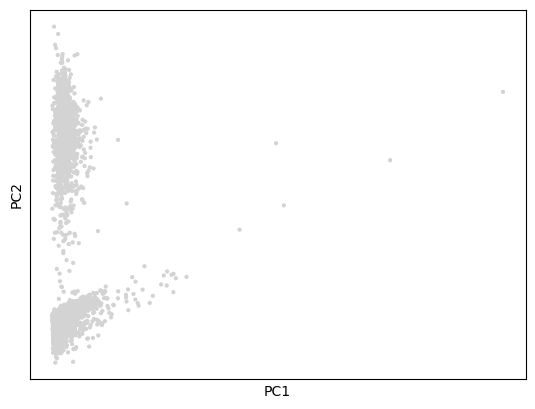

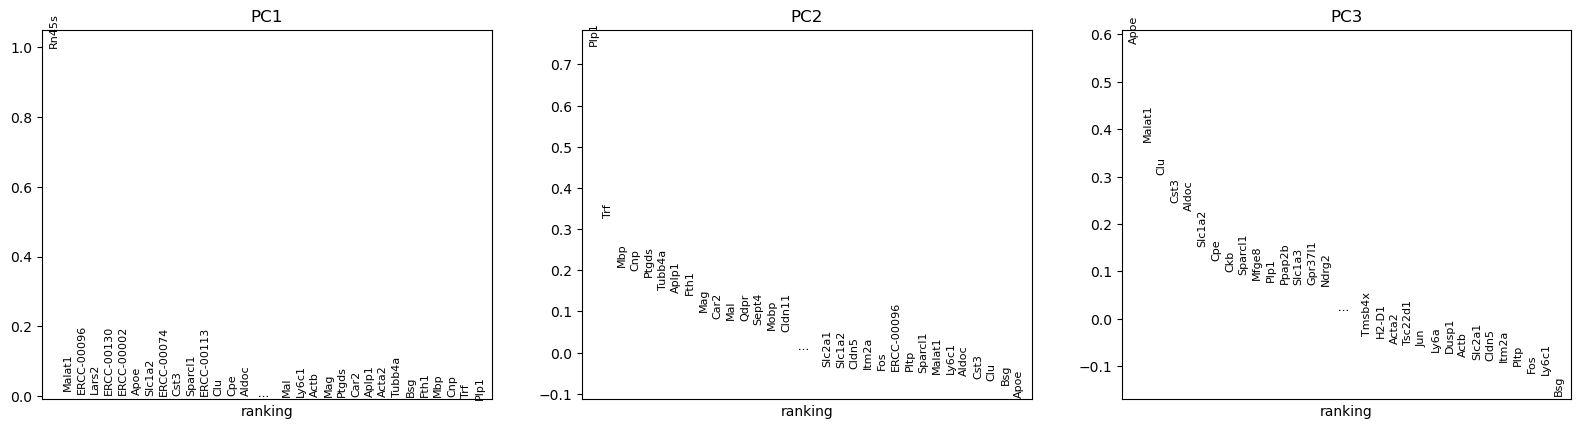

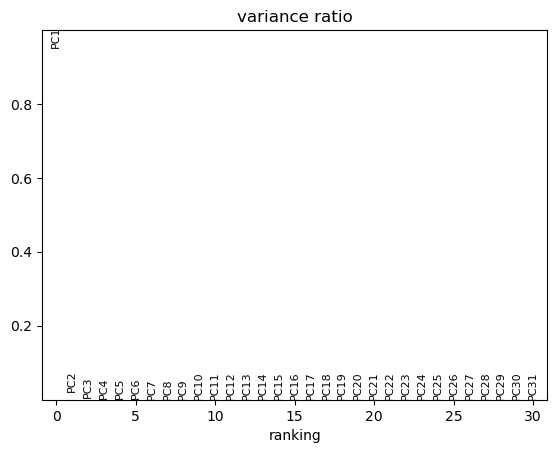

In [19]:
adata_cpm_ex = adata.copy() # make a copy so we can compare results
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True) # normalize
sc.pp.pca(adata_cpm_ex) # run pca
sc.pl.pca_overview(adata_cpm_ex) # plot pca

# Normalizing gene expression

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


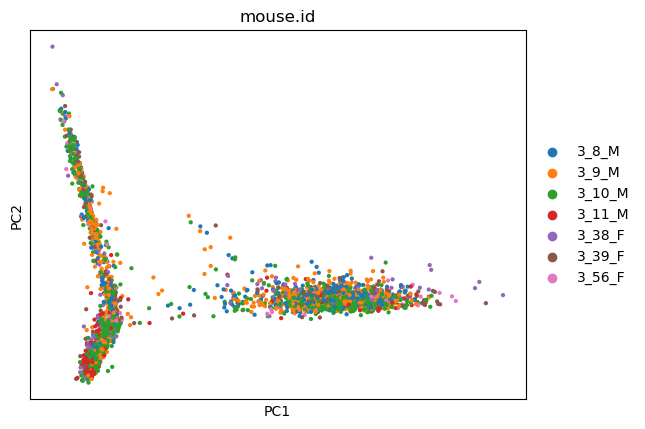

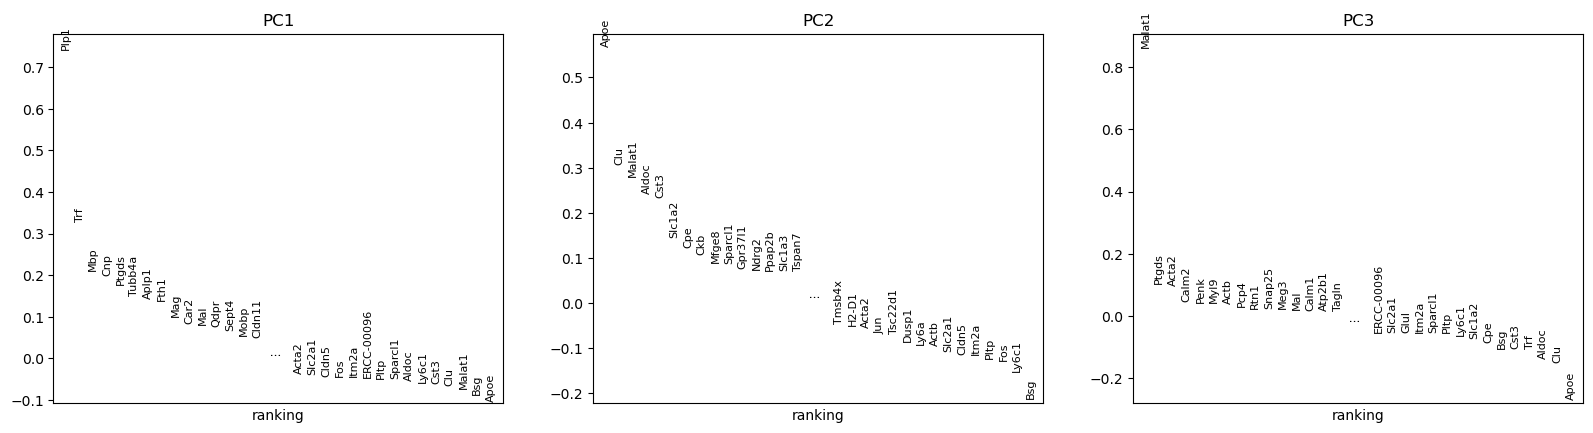

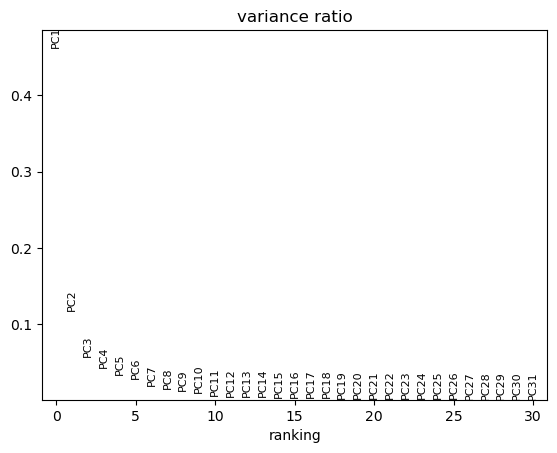

In [21]:
not_Rn45s = adata_cpm.var.index != 'Rn45s' #remove Rn45s
adata_no_Rn45s = adata_cpm[:, not_Rn45s]

sc.pp.pca(adata_no_Rn45s) 
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id') #run it again without Rn45s

C:\Anaconda\envs\master\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


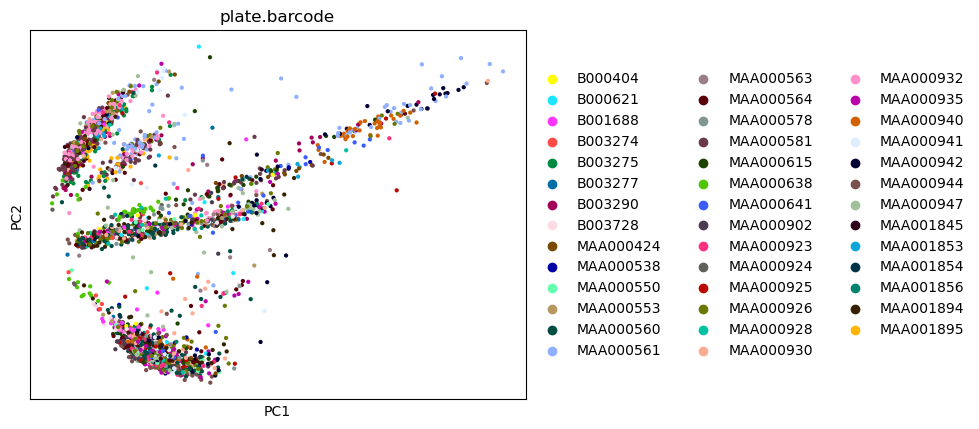

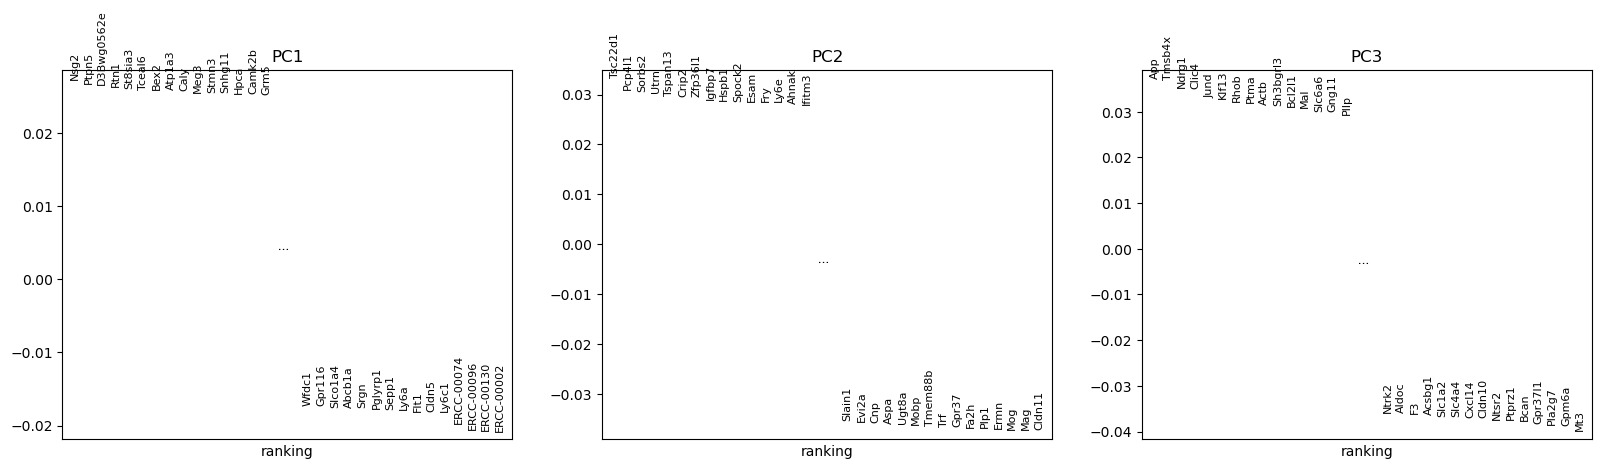

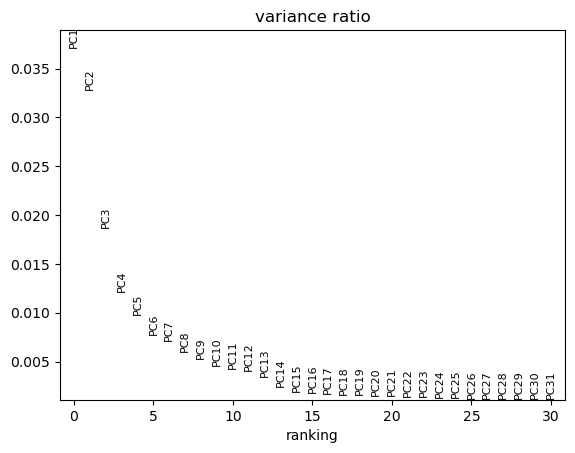

In [22]:
# centering and scaling
sc.pp.log1p(adata_cpm)
sc.pp.scale(adata_cpm)

sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='plate.barcode')